
# RESUME SCREENING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import joblib

In [2]:
resumeDataSet = pd.read_csv('C:/Users/DELL-INTERN-HR/Documents/RESUME SCREENING/Resume Screening.csv/Resume Screening.csv' ,encoding='utf-8')

In [3]:
resumeDataSet['cleaned_resume'] = ''

In [4]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


#### The categories of resumes present in the dataset:

In [5]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


#### The distinct categories of resume and the number of records belonging to each category:

In [6]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


#### Visualize the number of categories in the dataset:


In [7]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Category'>

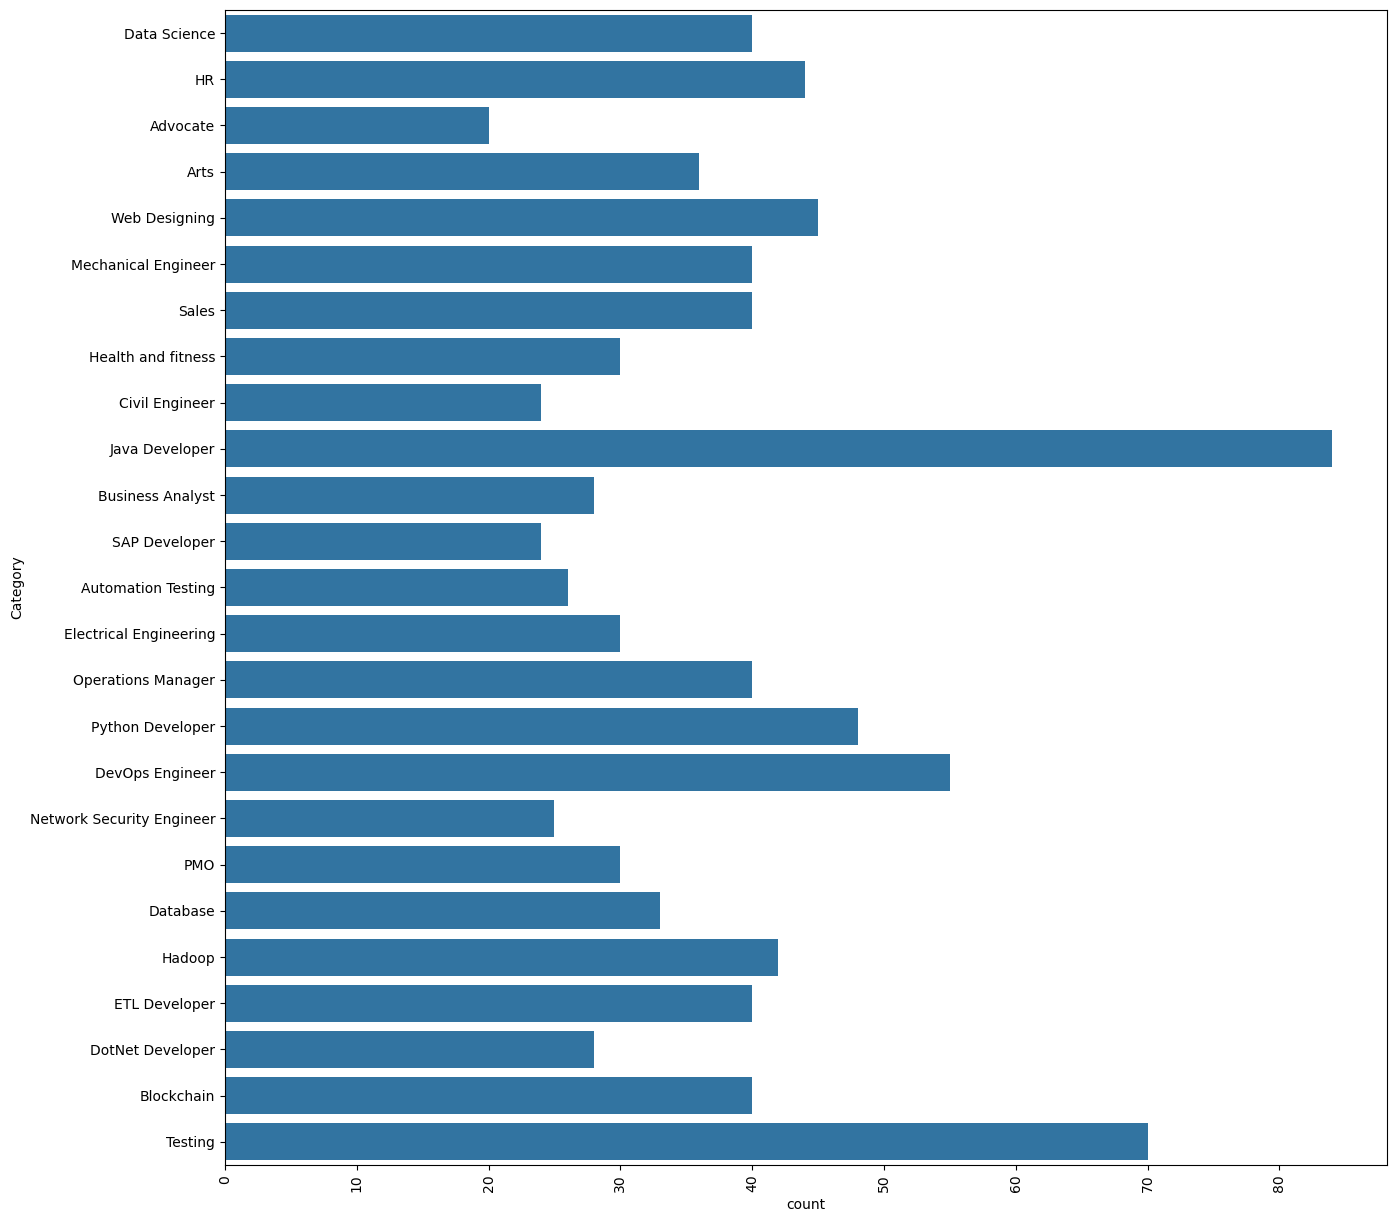

In [8]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category",data=resumeDataSet)

#### Visualize the distribution of categories:

In [9]:
from matplotlib.gridspec import GridSpec

In [10]:
targetCounts=resumeDataSet["Category"].value_counts()

In [11]:
targetLabels=resumeDataSet["Category"].unique()

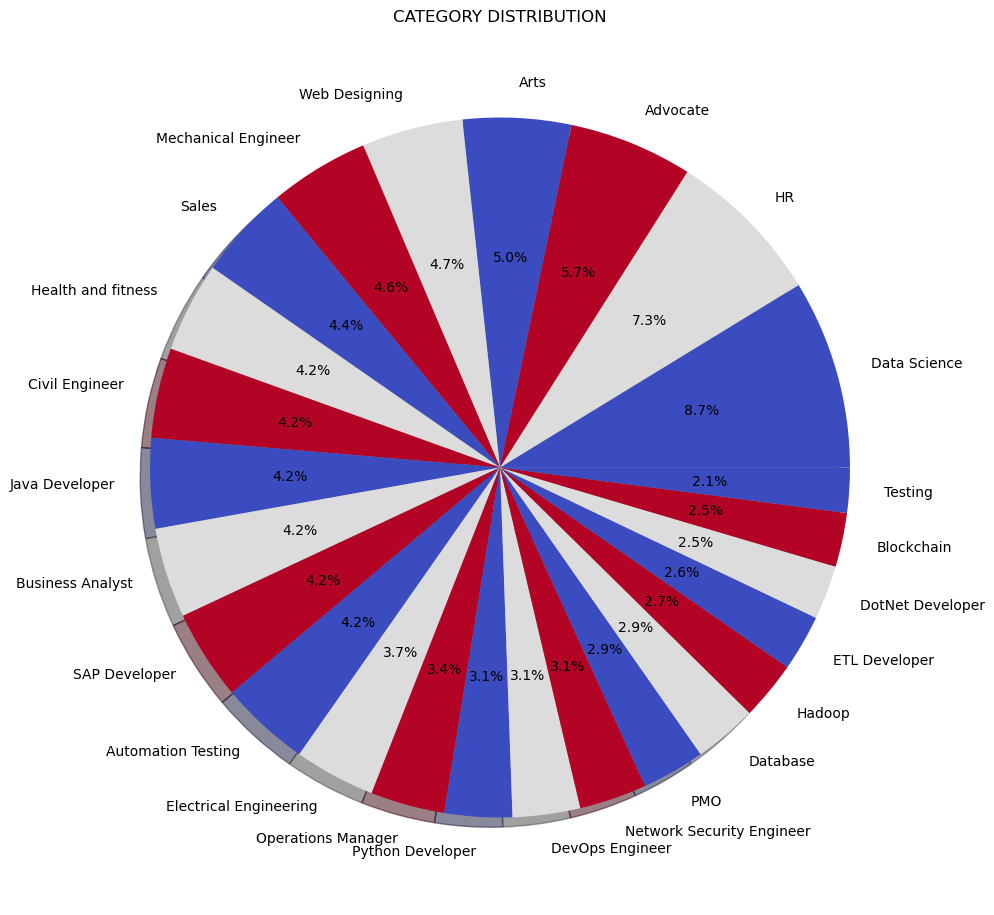

In [12]:
plt.figure(1,figsize=(25,25))
the_grid=GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie=plt.pie(targetCounts,labels=targetLabels,autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

#### Create a helper function to remove the URLs, hashtags, mentions, special letters, and punctuations:


In [13]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [14]:
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

#### Now as we have cleared the dataset, the next task is to have a look at the Wordcloud. A Wordcloud represents the most numbers of words larger and vice versa:

In [15]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [16]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])

In [17]:
totalWords =[]

In [18]:
Sentences = resumeDataSet['Resume'].values

In [19]:
cleanedSentences = ""

In [20]:
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [21]:
wordfreqdist = nltk.FreqDist(totalWords)

In [22]:
mostcommon = wordfreqdist.most_common(50)

In [23]:
mostcommon

[('Details', 484),
 ('Exprience', 446),
 ('months', 376),
 ('company', 330),
 ('description', 310),
 ('1', 290),
 ('year', 232),
 ('January', 216),
 ('Less', 204),
 ('Data', 200),
 ('data', 192),
 ('Skill', 166),
 ('Maharashtra', 166),
 ('6', 164),
 ('Python', 156),
 ('Science', 154),
 ('I', 146),
 ('Education', 142),
 ('College', 140),
 ('The', 126),
 ('project', 126),
 ('like', 126),
 ('Project', 124),
 ('Learning', 116),
 ('India', 114),
 ('Machine', 112),
 ('University', 112),
 ('Web', 106),
 ('using', 104),
 ('monthsCompany', 102),
 ('B', 98),
 ('C', 98),
 ('SQL', 96),
 ('time', 92),
 ('learning', 90),
 ('Mumbai', 90),
 ('Pune', 90),
 ('Arts', 90),
 ('A', 84),
 ('application', 84),
 ('Engineering', 78),
 ('24', 76),
 ('various', 76),
 ('Software', 76),
 ('Responsibilities', 76),
 ('Nagpur', 76),
 ('development', 74),
 ('Management', 74),
 ('projects', 74),
 ('Technologies', 72)]

In [24]:
wc = WordCloud().generate(cleanedSentences)

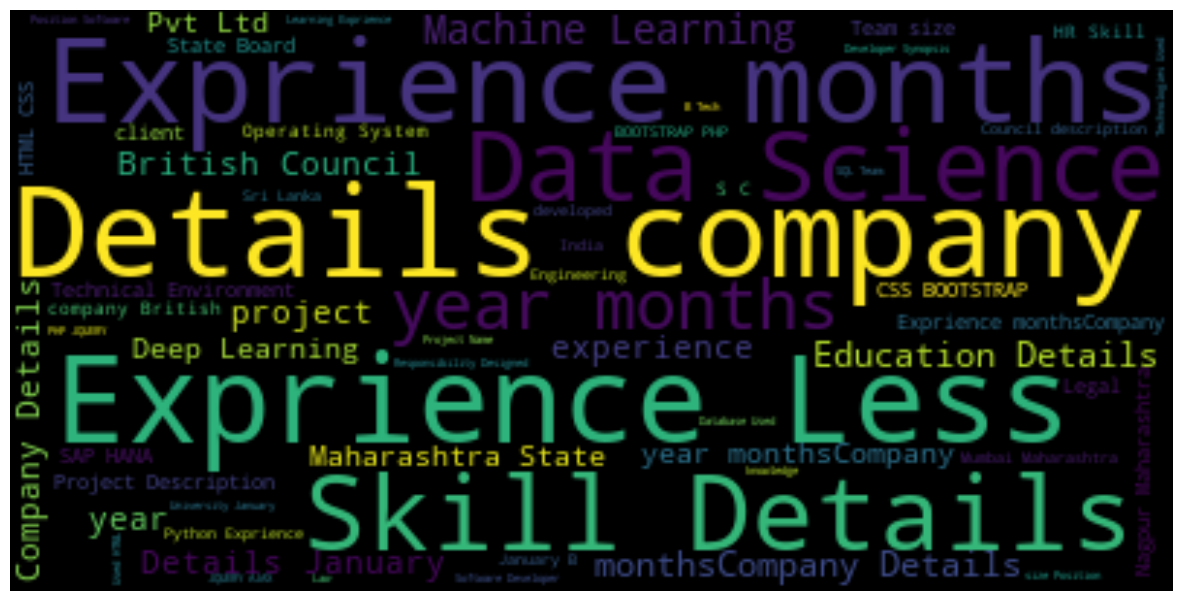

In [25]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Convert these words into categorical values:

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
var_mod = ['Category']
le = LabelEncoder()

In [28]:
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

# Training Machine Learning Model for Resume Screening

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [30]:
requiredText = resumeDataSet['cleaned_resume'].values

In [31]:
requiredTarget = resumeDataSet['Category'].values

In [32]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)

TfidfVectorizer(max_features=1500, stop_words='english', sublinear_tf=True)

In [33]:
WordFeatures = word_vectorizer.transform(requiredText)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)

In [35]:
X_train.shape

(769, 1500)

In [36]:
X_test.shape

(193, 1500)

# START TRAIN THE MODEL

In [37]:
clf = OneVsRestClassifier(KNeighborsClassifier())

In [38]:
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [39]:
prediction = clf.predict(X_test)

In [40]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of KNeighbors Classifier on training set: 0.99


In [41]:
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on test set: 0.99


In [42]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.

# SAVE THE MODEL

In [43]:
import joblib

# Save the vectorizer and the model
joblib.dump(word_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(clf, 'knn_resume_classifier.pkl')


['knn_resume_classifier.pkl']

In [44]:
import joblib

# Load vectorizer and model
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('knn_resume_classifier.pkl')

# Example input
new_resume = ["Experience in software development, Python, and machine learning."]  # Clean it like the training data

# Transform input text
new_features = vectorizer.transform(new_resume)

# Predict
prediction = model.predict(new_features)
print("Predicted Category:", prediction[0])


Predicted Category: 6


In [50]:
import joblib

# Load components
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('knn_resume_classifier.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Example resume
new_resume = ["Experienced in Python, pandas, scikit-learn, and model deployment."]
features = vectorizer.transform(new_resume)

# Predict
prediction = model.predict(features)

# Convert number to category
predicted_category = label_encoder.inverse_transform(prediction)[0]

print("Predicted Category:", predicted_category)


Predicted Category: Data Science


# SYSTEM

In [1]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the model components
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('knn_resume_classifier.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Predict function
def predict_category():
    resume_text = text_input.get("1.0", tk.END).strip()
    
    if not resume_text:
        messagebox.showwarning("Input Error", "Please enter some resume text.")
        return
    
    features = vectorizer.transform([resume_text])
    prediction = model.predict(features)
    predicted_category = label_encoder.inverse_transform(prediction)[0]
    
    result_label.config(text=f"Predicted Category: {predicted_category}")

# Create GUI window
root = tk.Tk()
root.title("Resume Category Predictor")
root.geometry("600x400")
root.configure(bg='white')

# Title
title_label = tk.Label(root, text="Resume Category Predictor", font=("Arial", 16, "bold"), bg='white')
title_label.pack(pady=10)

# Text input
text_input = tk.Text(root, height=12, width=70, wrap="word", font=("Arial", 10))
text_input.pack(pady=10)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_category, font=("Arial", 12), bg='lightblue')
predict_button.pack(pady=10)

# Output
result_label = tk.Label(root, text="", font=("Arial", 12, "bold"), bg='white', fg='green')
result_label.pack(pady=10)

# Start GUI loop
root.mainloop()
